# Auditory Sound Processing - Part III: Linear Filters (FIR & IIR)

In [1]:
%pylab inline
import os
from scipy.io.wavfile import read
from IPython.display import Audio, display

Populating the interactive namespace from numpy and matplotlib


# Linear Filters

## Finite Impulse Response-Filters (FIR): Feedforward
<img src="data\images\MovingFilter.jpg" width=500>

## Infinite Impulse Response-Filters (IIR): FIR + Feedback
<img src="data\images/IIR_filter.jpg" width=500>

## Examples

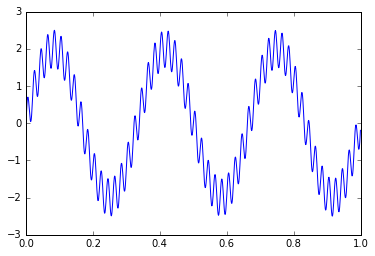

In [2]:
#Create a noisy data-set
rate = 1000
t = arange(0,1,1/rate)
freqs = [3, 50]
amps = [2, 0.5]
x = zeros(t.shape)
for freq, amp in zip(freqs,amps):
    x += amp * sin(2*pi*freq*t)
    
plot(t,x)

<font color='red'>
*Matlab Equivalent Commands*:
</font>


    Amplitudes = [2, 0.5];
    Frequencies = [3, 50]';
    Time = 0:1/rate:1;

    summed = Amplitudes * sin(2*pi*Frequencies*Time);


### Example 1:  Lowpass

[ 1.         -3.83582554  5.52081914 -3.53353522  0.848556  ]
[  8.98486146e-07   3.59394459e-06   5.39091688e-06   3.59394459e-06
   8.98486146e-07]


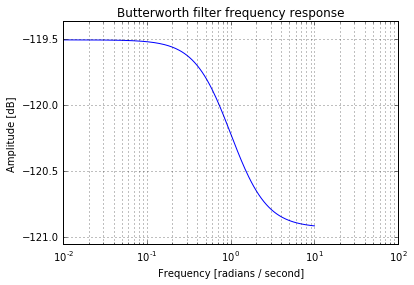

In [3]:
#Filter coefficients
from scipy import signal
Nyq = rate/2
b,a = signal.butter(4, 10/Nyq)

w, h = signal.freqs(b, a)
semilogx(w, 20 * log10(abs(h)))
title('Butterworth filter frequency response')
xlabel('Frequency [radians / second]')
ylabel('Amplitude [dB]')
margins(0, 0.1)
grid(which='both', axis='both')
axvline(100, color='green') # cutoff frequency
print(a)
print(b)

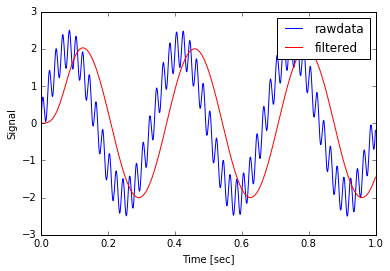

In [4]:
# Apply the filter to the noisy data
filtered = signal.lfilter(b,a,x)

plot(t,x, label='rawdata')
hold(True)
plot(t,filtered, 'r', label='filtered')
xlabel('Time [sec]')\

ylabel('Signal')
legend()

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    filtered = filter(b,a,x);

### Example 2: "filtfilt" - Lowpass, without delay

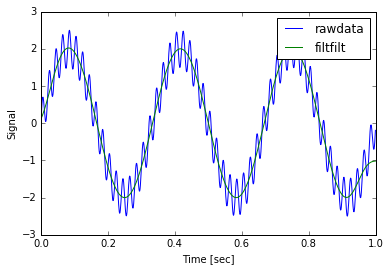

In [5]:
# For offline analysis, the delay can be eliminated through filtering once from the front, and once from the back
ffiltered = signal.filtfilt(b,a,x)

plot(t,x, label='rawdata')
hold(True)
plot(t,ffiltered, 'g', label='filtfilt')
xlabel('Time [sec]')\

ylabel('Signal')
legend()

### Example 3: Bandpass

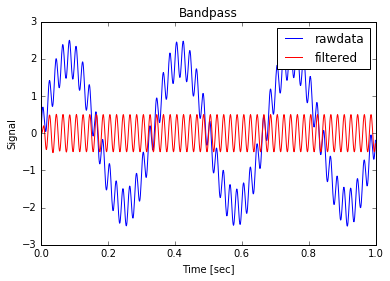

In [6]:
b,a = signal.butter(4, r_[20,100]/Nyq, 'bandpass')
filtered = signal.lfilter(b,a,x)

plot(t,x, label='rawdata')
hold(True)
plot(t,filtered, 'r', label='filtered')
xlabel('Time [sec]')
ylabel('Signal')
title('Bandpass')
legend()

    Author: Thomas Haslwanter
    Date: March 06, 2016
    Ver: 1.0

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.